In [2]:
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:
data = pd.read_csv('options2.csv')
data.head()

,FCTNO,VLTY,TIME,STRIKE,OPRICE
0,1,0.2,5.0,75.0,25.0
1,2,0.2,5.0,76.0,24.0
2,3,0.2,5.0,77.0,23.0
3,4,0.2,5.0,78.0,22.0
4,5,0.2,5.0,79.0,21.0


In [214]:
from sklearn import preprocessing
#Feature Scaling
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(data)
data = pd.DataFrame(robust_scaled_df, columns=['FCTNO', 'VLTY', 'TIME', 'STRIKE', 'OPRICE'])

#Normalizing the data
scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(data)
data = pd.DataFrame(scaled_df, columns=data.columns)

data.head()

,FCTNO,VLTY,TIME,STRIKE,OPRICE
0,-0.475855,-0.430022,-0.323628,-0.467874,0.514783
1,-0.487963,-0.441569,-0.332296,-0.461190,0.493753
2,-0.500282,-0.453337,-0.341131,-0.453724,0.471135
3,-0.512754,-0.465276,-0.350093,-0.445399,0.446830
4,-0.525309,-0.477322,-0.359136,-0.436135,0.420741


In [5]:
X = data.iloc[:, 1:4].values
y = data.iloc[:, 4].values


In [121]:
## 3-layer model

model = Sequential()
model.add(Dense(20, input_dim = 3, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [ ]:
## 3-layer model

model = Sequential()
model.add(Dense(100, input_dim = 3, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [206]:
## 4-layer model

model = Sequential()
model.add(Dense(30, input_dim = 3, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [66]:
## 5-layer model

model = Sequential()
model.add(Dense(30, input_dim = 3, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [211]:
## 5-layer model

model = Sequential()
model.add(Dense(50, input_dim = 3, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [90]:
import tensorflow as tf
accepted_diff = 0.01
def linear_regression_equality(y_true, y_pred):
    diff = K.abs(y_true-y_pred)
    return K.mean(K.cast(diff < accepted_diff, tf.float32))

In [207]:
import keras.backend as K
def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

In [212]:
model.compile(loss='mean_squared_error', optimizer='adagrad', metrics=[soft_acc])

In [213]:
history = model.fit(X, y, epochs=100,validation_split=0.2, batch_size=10)

Train on 1224 samples, validate on 306 samples
Epoch 1/100
1224/1224 [==============================] - 2s 2ms/step - loss: 0.0167 - soft_acc: 0.7917 - val_loss: 0.0030 - val_soft_acc: 0.9837
Epoch 2/100
1224/1224 [==============================] - 0s 281us/step - loss: 0.0078 - soft_acc: 0.8219 - val_loss: 0.0038 - val_soft_acc: 0.9641
Epoch 3/100
1224/1224 [==============================] - 0s 279us/step - loss: 0.0071 - soft_acc: 0.8366 - val_loss: 0.0039 - val_soft_acc: 0.9641
Epoch 4/100
1224/1224 [==============================] - 0s 274us/step - loss: 0.0065 - soft_acc: 0.8497 - val_loss: 0.0025 - val_soft_acc: 0.9510
Epoch 5/100
1224/1224 [==============================] - 0s 267us/step - loss: 0.0061 - soft_acc: 0.8570 - val_loss: 0.0055 - val_soft_acc: 0.9118
Epoch 6/100
1224/1224 [==============================] - 0s 281us/step - loss: 0.0057 - soft_acc: 0.8685 - val_loss: 0.0067 - val_soft_acc: 0.9412
Epoch 7/100
1224/1224 [==============================] - 0s 271us/step - 

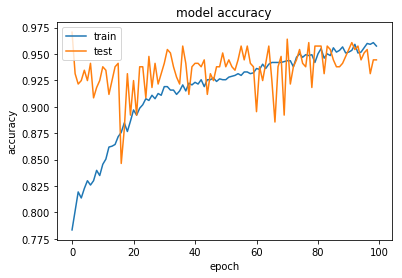

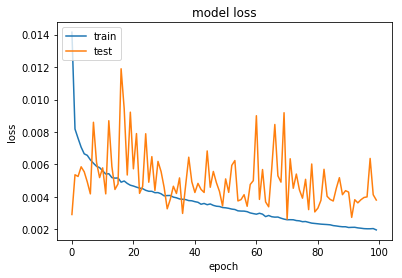

In [210]:
# summarize history for accuracy
plt.plot(history.history['soft_acc'])
plt.plot(history.history['val_soft_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()